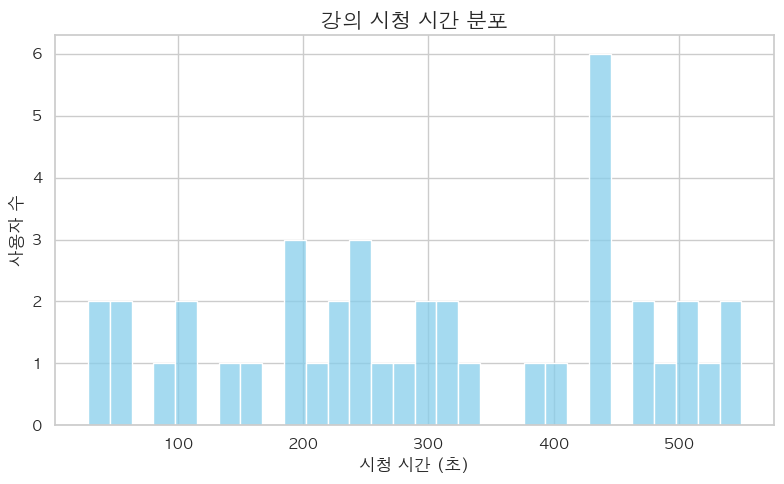

In [13]:

# 1️⃣ 강의 시청 시간 분포 시각화

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Suppress matplotlib font-related warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 5))
sns.histplot(df['elapsed'], bins=30, color='skyblue', edgecolor='white')
plt.title("강의 시청 시간 분포", fontsize=15)
plt.xlabel("시청 시간 (초)")
plt.ylabel("사용자 수")
plt.tight_layout()
plt.show()
# 시각화를 위한 초기 설정

import pandas as pd
import seaborn as sns

# Seaborn 스타일
sns.set(style="whitegrid")


In [12]:

import numpy as np
# 데이터 불러오기
df = pd.read_csv('data/sample.csv')
# 임의 'elapsed' 컬럼 생성 (10초~600초, 시각화 테스트용)
df['elapsed'] = np.random.randint(10, 600, size=len(df))  # 임의 시청 시간(10초~10분)
df.head()


,timestamp,action_type,item_id,source,user_answer,platform,elapsed
0,1543196401412,enter,b4955,diagnosis,NaN,mobile,244
1,1543196412691,respond,q6423,diagnosis,c,mobile,506
2,1543196417228,submit,b4955,diagnosis,NaN,mobile,471
3,1543196417283,enter,b68,diagnosis,NaN,mobile,220
4,1543196427594,respond,q68,diagnosis,d,mobile,28


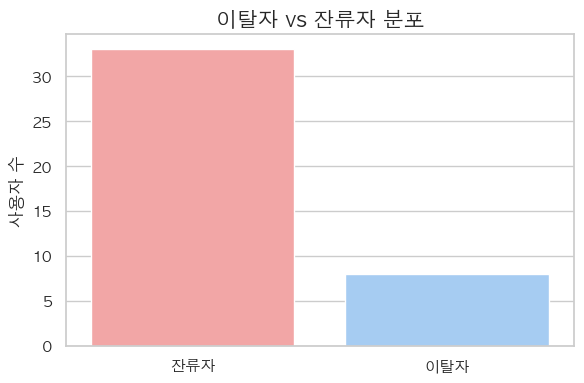

In [19]:
# 3️⃣ 이탈 기준 정의 및 분류 시각화

# 이탈 여부 정의 (150초 미만이면 이탈)
df['dropout'] = df['elapsed'] < 150

# 이탈/잔류 비율 시각화
dropout_counts = df['dropout'].value_counts().rename({True: '이탈자', False: '잔류자'})

plt.figure(figsize=(6, 4))
colors = ['#FF9999', '#99CCFF']
sns.barplot(x=dropout_counts.index, y=dropout_counts.values, hue=dropout_counts.index, palette=colors, legend=False)
plt.title("이탈자 vs 잔류자 분포", fontsize=15)
plt.ylabel("사용자 수")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [21]:
# 데이터셋에 lecture_id가 없으면, 임시로 생성 (총 50개의 강의로 가정)
np.random.seed(42)
df['lecture_id'] = np.random.choice([f"L{i}" for i in range(1, 51)], size=len(df))

In [22]:
# 4️⃣ 강의 콘텐츠별 이탈 경향 시각화

# 각 lecture_id 별 이탈률 계산
lecture_dropout = df.groupby('lecture_id')['dropout'].mean().sort_values(ascending=False)

# 상위 10개 강의 선택
top10_dropout = lecture_dropout.head(10)

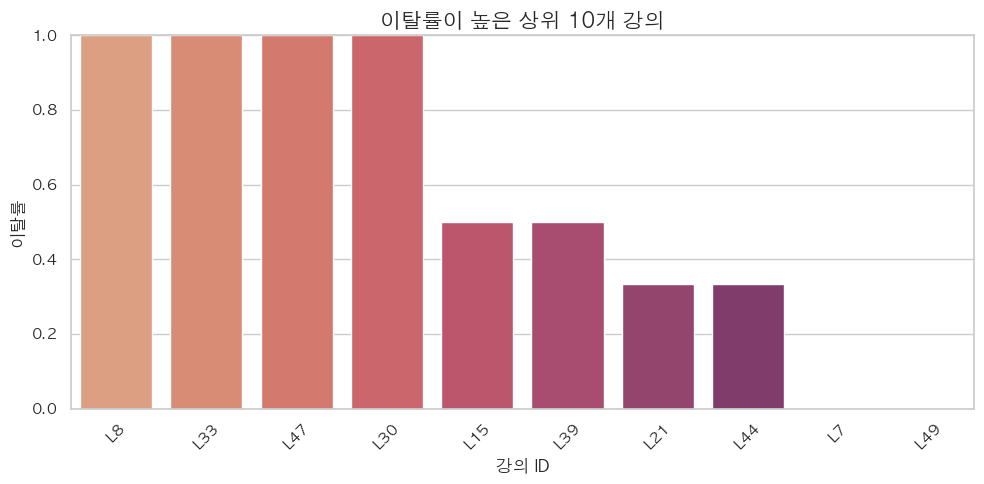

In [24]:
plt.figure(figsize=(10, 5))
colors = sns.color_palette("flare", len(top10_dropout))
sns.barplot(
    x=top10_dropout.index,
    y=top10_dropout.values,
    hue=top10_dropout.index,
    palette=colors,
    legend=False
)
plt.title("이탈률이 높은 상위 10개 강의", fontsize=15)
plt.xlabel("강의 ID")
plt.ylabel("이탈률")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()